
image
binary-2-d,pixel-0/1,bw image
grey scale-2d,picel-0-255,256 colour
rgb-256*256*256,3d


In [ ]:
#to load data
import tensorflow as tf
import numpy as np
fas_data=tf.keras.datasets.fashion_mnist
(train_image,train_label),(test_image,test_label)=fas_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#explore the data-set
print(train_image.shape)
print(train_label[0:20])
print(np.unique(train_label))
print("Number of class",len(np.unique(train_label)))
print(test_image.shape)
print(np.unique(test_label))

(60000, 28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
[0 1 2 3 4 5 6 7 8 9]
Number of class 10
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


(28, 28)


Text(0.5, 0, 'trouser')

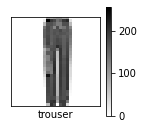

In [ ]:
#exploring an image
i=1000 #image number we can choose this from our data-set
print(train_image[i].shape)
class_name=['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle bot']
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(train_image[i],cmap=plt.cm.binary)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(class_name[train_label[i]])

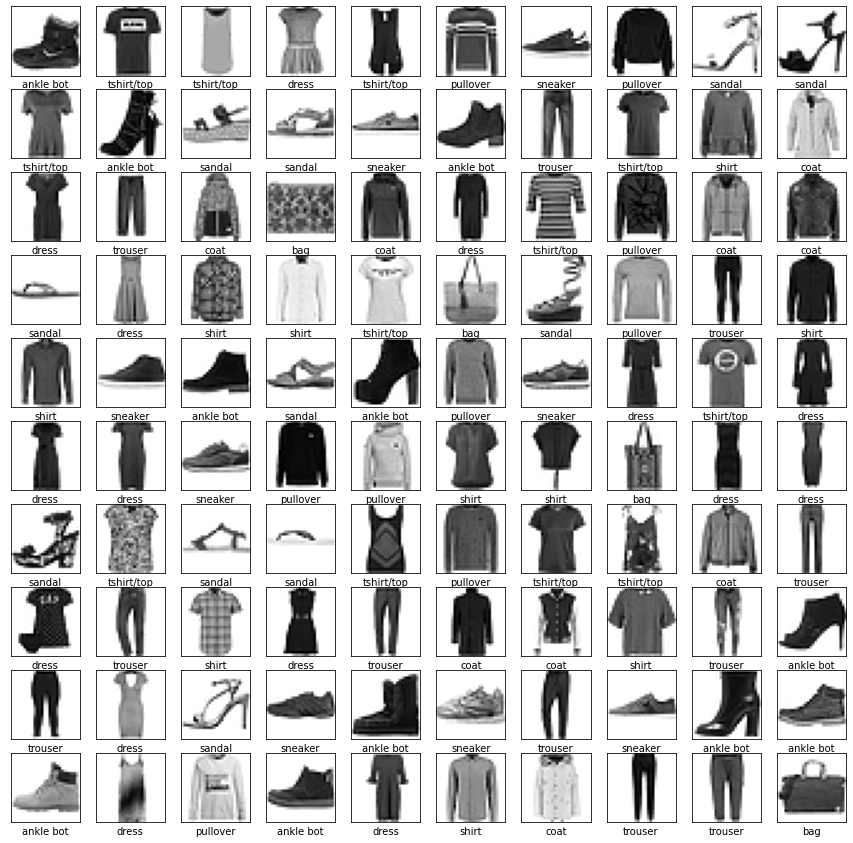

In [ ]:
# to visualise 100 image
plt.figure(figsize=(15,15))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(train_image[i],cmap=plt.cm.binary)#if less no. then rest space remains blank
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_name[train_label[i]])
plt.show()  

In [ ]:
train_image[i]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,  57,
         78,  87,  47,  25,   4,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  12, 154, 123,
         33,  57,  48,  82, 118,  56,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  94, 125,   0,
          0,   0,   0,   0,  86, 203,  39,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
## data preprocessing
#input data=scaling pixel value[0-1]
train_image=train_image/255.0
test_image=test_image/255.0


In [ ]:
#to convert matrix to vector
#do flatten-in one line
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128))#no. of layers
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_image,train_label,epochs=10,validation_split=0.2,batch_size=100)

Epoch 1/10
480/480 [==============================] - 4s 6ms/step - loss: 0.5713 - accuracy: 0.7999 - val_loss: 0.4774 - val_accuracy: 0.8365
Epoch 2/10
480/480 [==============================] - 2s 5ms/step - loss: 0.4602 - accuracy: 0.8400 - val_loss: 0.4516 - val_accuracy: 0.8399
Epoch 3/10
480/480 [==============================] - 2s 5ms/step - loss: 0.4425 - accuracy: 0.8440 - val_loss: 0.4536 - val_accuracy: 0.8465
Epoch 4/10
480/480 [==============================] - 2s 5ms/step - loss: 0.4327 - accuracy: 0.8483 - val_loss: 0.4528 - val_accuracy: 0.8454
Epoch 5/10
480/480 [==============================] - 2s 5ms/step - loss: 0.4266 - accuracy: 0.8512 - val_loss: 0.4505 - val_accuracy: 0.8472
Epoch 6/10
480/480 [==============================] - 2s 5ms/step - loss: 0.4207 - accuracy: 0.8530 - val_loss: 0.4325 - val_accuracy: 0.8532
Epoch 7/10
480/480 [==============================] - 2s 5ms/step - loss: 0.4182 - accuracy: 0.8528 - val_loss: 0.4538 - val_accuracy: 0.8418
Epoch 

In [ ]:
model.save('my_model')

In [ ]:
test_loss,test_acc=model.evaluate(test_image,test_label)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4745 - accuracy: 0.8356
0.8356000185012817


In [ ]:
d=hist.history
d.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

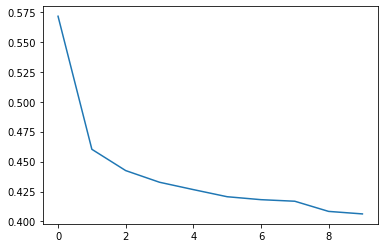

In [ ]:
plt.plot(range(10),d["loss"])#we can change this value

In [ ]:
pred=model.predict(test_image)

In [ ]:
p=np.argmax(pred,axis=1)
print(p[0:10])
print(test_label[0:10])
#both same so accuracy is high

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(p,test_label)
cm
#####it gives how much image get misclassified

array([[728,   2,  10,  15,   0,   0,  92,   0,   4,   0],
       [  4, 958,   4,  10,   1,   0,   3,   0,   1,   0],
       [ 16,   1, 694,  13,  91,   0, 104,   0,   2,   0],
       [ 41,  29,   7, 832,  21,   0,  29,   0,   4,   0],
       [  7,   5, 143,  46, 781,   0, 106,   0,   3,   0],
       [  3,   0,   2,   3,   3, 952,   3,  80,  12,  13],
       [183,   3, 114,  68,  88,   0, 619,   0,   7,   0],
       [  0,   0,   1,   0,   1,  23,   0, 874,   6,  27],
       [ 18,   2,  24,  13,  14,   3,  42,   0, 959,   1],
       [  0,   0,   1,   0,   0,  22,   2,  46,   2, 959]])

In [ ]:
i=1080
print(pred[i])
print("predicted label",tf.argmax(pred[i]).numpy())
print("predicted class",class_name[tf.argmax(pred[i]).numpy()])
print("target class",class_name[test_label[i]])
print('probability',tf.reduce_max(pred[i]).numpy()*100)



[8.0478494e-04 6.6487589e-03 6.7856023e-04 9.9113095e-01 3.5591942e-04
 8.0956397e-09 8.2184408e-05 1.3106517e-06 2.7108428e-04 2.6415577e-05]
predicted label 3
predicted class dress
target class dress
probability 99.11309480667114


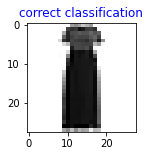

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(test_image[i],cmap=plt.cm.binary)
pc=class_name[tf.argmax(pred[i]).numpy()]
tc=class_name[test_label[i]]
if pc==tc:
  plt.title("correct classification",color="b")
else:
  plt.title("incorrect classification",color="r")


In [ ]:
#prediction on single image
i=10
img=test_image[i]
print(img.shape)
img=tf.expand_dims(img,0)
print(img.shape)
pred=model.predict(img)
print(pred[0])
print("predicted label",tf.argmax(pred[0]).numpy())
print("predicted class",class_name[tf.argmax(pred[0]).numpy()])
print("probability",tf.reduce_max(pred[0]).numpy()*100)


(28, 28)
(1, 28, 28)
[1.0354490e-03 5.7106847e-03 2.4274416e-01 9.5245818e-04 6.8704116e-01
 1.9804820e-06 6.2192000e-02 2.2986331e-08 3.2197052e-04 9.1929358e-08]
predicted label 4
predicted class coat
probability 68.7041163444519


In [ ]:
#1)flatten- no bias only flatten input-576 neuron
#2)dense-576*128+(128)=100480 har neuron har neuron se connected hai
#3)(128*128)+(128)
#4)(128*10)+10
